In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/2.Decision Tree
%ls

Mounted at /content/drive
/content/drive/MyDrive/2.Decision Tree
 Customers2.csv  'Decision Tree.ipynb'   Shows.csv       test_set.csv
 Customers.csv    mydecisiontree.png     test_set2.csv


In [2]:
import pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pandas.read_csv("Customers2.csv")

print(df)

       Age  Income Student Credit_rating Gender Education Buy_computer
0    young    high      no          fair      M        Bs           no
1    young    high      no     excellent      F        Ms           no
2   middle    high      no          fair      F       Phd          yes
3      old  medium      no          fair      M       Phd          yes
4      old     low     yes          fair      M        Bs          yes
5      old     low     yes     excellent      F       Phd           no
6   middle     low     yes     excellent      F        Ms          yes
7    young  medium      no          fair      F        Ms           no
8    young     low     yes          fair      M        Ms          yes
9      old  medium     yes          fair      F        Bs          yes
10   young  medium     yes     excellent      M        Ms          yes
11  middle  medium      no     excellent      M        Bs          yes
12  middle    high     yes          fair      M       Phd          yes
13    

In [5]:
print(df['Buy_computer'])

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buy_computer, dtype: object


In [6]:
d_age = {'young': 0, 'middle': 1, 'old': 2}
df['Age'] = df['Age'].map(d_age)
print(df)

    Age  Income Student Credit_rating Gender Education Buy_computer
0     0    high      no          fair      M        Bs           no
1     0    high      no     excellent      F        Ms           no
2     1    high      no          fair      F       Phd          yes
3     2  medium      no          fair      M       Phd          yes
4     2     low     yes          fair      M        Bs          yes
5     2     low     yes     excellent      F       Phd           no
6     1     low     yes     excellent      F        Ms          yes
7     0  medium      no          fair      F        Ms           no
8     0     low     yes          fair      M        Ms          yes
9     2  medium     yes          fair      F        Bs          yes
10    0  medium     yes     excellent      M        Ms          yes
11    1  medium      no     excellent      M        Bs          yes
12    1    high     yes          fair      M       Phd          yes
13    2  medium      no     excellent      F    

In [7]:
d_income = {'high': 0, 'medium': 1, 'low': 2}
df['Income'] = df['Income'].map(d_income)

d_student = {'no': 0, 'yes': 1}
df['Student'] = df['Student'].map(d_student)

d_credit_rating = {'fair': 0, 'excellent': 1}
df['Credit_rating'] = df['Credit_rating'].map(d_credit_rating)

d_buy = {'no': 0, 'yes': 1}
df['Buy_computer'] = df['Buy_computer'].map(d_buy)

#print(df)

In [8]:
d_gender = {'F': 0 , 'M': 1}
d_education = {'Bs': 0 , 'Ms':1, 'Phd': 2}

df['Gender'] = df['Gender'].map(d_gender)
df['Education'] = df['Education'].map(d_education)

print(df)

    Age  Income  Student  Credit_rating  Gender  Education  Buy_computer
0     0       0        0              0       1          0             0
1     0       0        0              1       0          1             0
2     1       0        0              0       0          2             1
3     2       1        0              0       1          2             1
4     2       2        1              0       1          0             1
5     2       2        1              1       0          2             0
6     1       2        1              1       0          1             1
7     0       1        0              0       0          1             0
8     0       2        1              0       1          1             1
9     2       1        1              0       0          0             1
10    0       1        1              1       1          1             1
11    1       1        0              1       1          0             1
12    1       0        1              0       1    

In [9]:
features = ['Age', 'Income', 'Student', 'Credit_rating', 'Gender', 'Education']

X = df[features]
y = df['Buy_computer']

print(X)
print('\n\n')
print(y)

    Age  Income  Student  Credit_rating  Gender  Education
0     0       0        0              0       1          0
1     0       0        0              1       0          1
2     1       0        0              0       0          2
3     2       1        0              0       1          2
4     2       2        1              0       1          0
5     2       2        1              1       0          2
6     1       2        1              1       0          1
7     0       1        0              0       0          1
8     0       2        1              0       1          1
9     2       1        1              0       0          0
10    0       1        1              1       1          1
11    1       1        0              1       1          0
12    1       0        1              0       1          2
13    2       1        0              1       0          0



0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree = dtree.fit(X, y)

In [12]:
test = pandas.read_csv("test_set2.csv")

test['Age'] = test['Age'].map(d_age)

test['Income'] = test['Income'].map(d_income)

test['Student'] = test['Student'].map(d_student)

test['Credit_rating'] = test['Credit_rating'].map(d_credit_rating)

#print(test)

In [13]:
test['Gender'] = test['Gender'].map(d_gender)
test['Education'] = test['Education'].map(d_education)

print(test)

   Age  Income  Student  Credit_rating  Gender  Education
0    2       2        1              0       0          1


In [14]:
y_pred = dtree.predict(test)
print(y_pred)

[1]


In [15]:

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

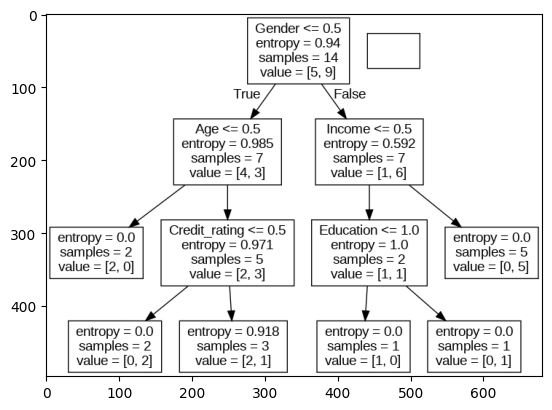

In [16]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()